In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("D:\\codin grapp\\intalipaat assianments\\capstone project\\archive\\census-income.csv")

In [3]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
data.shape

(32561, 15)

In [19]:
data['workclass'].unique()

array(['?', 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

# data preprocessing

In [9]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education.num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital.gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital.loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


# Data Manipulation:

$a) Extract the “education” column and store it in “census_ed” $

In [13]:
census_ed=data[['education']]
census_ed.head()

,education
0,HS-grad
1,HS-grad
2,Some-college
3,7th-8th
4,Some-college


 $b) Extract all the columns from “age” to “relationship” and store it in “census_seq”$

In [14]:
census_seq=data.iloc[:,0:8]
census_seq.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family
2,66,?,186061,Some-college,10,Widowed,?,Unmarried
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child


$c) Extract the column number “5”, “8”, “11” and store it in “census_col”.$

In [15]:
census_col=data.iloc[:,[5,8,11]]
census_col.head()

,marital.status,race,capital.loss
0,Widowed,White,4356
1,Widowed,White,4356
2,Widowed,Black,4356
3,Divorced,White,3900
4,Separated,White,3900


$d) Extract all the male employees who work in state-gov and store it in “male_gov”.$

In [24]:
male_gov=data[(data['workclass']=='State-gov') & (data['sex']=='Male')]
male_gov.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
52,51,State-gov,68898,Assoc-voc,11,Divorced,Tech-support,Not-in-family,White,Male,0,2444,39,United-States,>50K
121,68,State-gov,235882,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,2377,60,United-States,>50K
132,68,State-gov,202699,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,2377,42,?,>50K
152,28,State-gov,381789,Some-college,10,Separated,Exec-managerial,Own-child,White,Male,0,2339,40,United-States,<=50K
169,46,State-gov,192779,Assoc-acdm,12,Divorced,Adm-clerical,Unmarried,White,Male,0,2258,38,United-States,>50K


$e) Extract all the 39 year olds who either have a bachelor's degree or who are native of the United States and store the result in “census_us”.$

In [27]:
census=data[(data['age']==39)]

census_us=census[(census['education']=='Bachelors') | (census['native.country']=='United-States')]

In [28]:
census_us.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
54,39,Private,141584,Masters,14,Never-married,Sales,Not-in-family,White,Male,0,2444,45,United-States,>50K
68,39,Self-emp-inc,329980,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,2415,60,United-States,>50K
74,39,Private,179731,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,2415,65,United-States,>50K
92,39,Private,348521,Some-college,10,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,2415,99,United-States,>50K
97,39,Self-emp-inc,143123,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,White,Male,0,2415,40,United-States,>50K


$f) Extract 200 random rows from the “census” data frame and store it in “census_200”.$

In [30]:
census_200=data.sample(200)

census_200

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
11958,43,Private,37402,Masters,14,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,25,United-States,<=50K
20173,60,Self-emp-not-inc,89884,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States,<=50K
14968,43,Private,172401,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,>50K
29387,46,Private,176552,11th,7,Divorced,Prof-specialty,Unmarried,Amer-Indian-Eskimo,Male,0,0,40,United-States,>50K
25554,31,Private,193132,Bachelors,13,Never-married,Tech-support,Not-in-family,White,Female,0,0,42,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30690,64,Private,137205,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,48,United-States,<=50K
28287,73,?,131982,Bachelors,13,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,5,Vietnam,<=50K
29876,18,?,312634,11th,7,Never-married,?,Own-child,White,Male,0,0,25,United-States,<=50K
25668,36,Self-emp-inc,180419,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,45,United-States,<=50K


$g) Get the count of different levels of the “workclass” column$

In [32]:
data[['workclass']].value_counts()

workclass       
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
dtype: int64

$h) Calculate the mean of the “capital.gain” column grouped according to “workclass”.$

In [35]:
data.groupby(['workclass'])['capital.gain'].mean()

workclass
?                    606.795752
Federal-gov          833.232292
Local-gov            880.202580
Never-worked           0.000000
Private              889.217792
Self-emp-inc        4875.693548
Self-emp-not-inc    1886.061787
State-gov            701.699538
Without-pay          487.857143
Name: capital.gain, dtype: float64

$i) Create a separate dataframe with the details of males and females from the census data that has income more than 50,000. $

In [37]:
data['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

In [38]:
data['income'].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [43]:
male_50k=data[(data['sex']=='Male') & (data['income']=='>50K')]
female_50K=data[(data['sex']=='Female') & (data['income']=='>50K')]

In [46]:
female_50K.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
10,45,Private,172274,Doctorate,16,Divorced,Prof-specialty,Unmarried,Black,Female,0,3004,35,United-States,>50K
12,52,Private,129177,Bachelors,13,Widowed,Other-service,Not-in-family,White,Female,0,2824,20,United-States,>50K
31,59,Self-emp-inc,107287,10th,6,Widowed,Exec-managerial,Unmarried,White,Female,0,2559,50,United-States,>50K
35,63,Federal-gov,39181,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Female,0,2559,60,United-States,>50K


In [47]:
male_50k.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K
11,38,Self-emp-not-inc,164526,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,0,2824,45,United-States,>50K
13,32,Private,136204,Masters,14,Separated,Exec-managerial,Not-in-family,White,Male,0,2824,55,United-States,>50K
14,51,?,172175,Doctorate,16,Never-married,?,Not-in-family,White,Male,0,2824,40,United-States,>50K
15,46,Private,45363,Prof-school,15,Divorced,Prof-specialty,Not-in-family,White,Male,0,2824,40,United-States,>50K


$j) Calculate the percentage of people from the United States who are private employees and earn less than 50,000 annually.$

In [57]:
p_le50k=data[(data['native.country']=='United-States') & (data['workclass']=='Private') &(data['income']=='<=50K')]

In [56]:
total=len(data)

In [59]:
percentage=(len(p_le50k)/total)*100

In [60]:
percentage

47.891649519363654

$k) Calculate the percentage of married people in the census data.$

In [61]:
data['marital.status'].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital.status, dtype: int64

In [68]:
total=len(data['marital.status'])
married=14976+10683+23

precen_ma=(married/total)*100

precen_ma

78.87349897116181

$l) Calculate the percentage of high school graduates earning more than 50,000 annually. $

In [69]:
data['education'].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [71]:
hs_m50k=len(data[(data['education']=='HS-grad') &(data['income']=='>50K')])

percentage_hs_m50k=(hs_m50k/total)*100

percentage_hs_m50k

5.144190903227788

In [74]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


# 3. Linear Regression:

In [ ]:
3. Linear Regression:
a) Build a simple linear regression model as follows:

●	Divide the dataset into training and test sets in 70:30 ratio.
●	Build a linear model on the test set where the dependent variable is “hours.per.week” and the independent variable is “education.num”.
●	Predict the values on the train set and find the error in prediction. 
●	Find the root-mean-square error (RMSE).


In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [73]:
lr=LinearRegression()

In [81]:
x=data[['hours.per.week']]
y=data['education.num']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=1)
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

print('mean_squared_error :',mean_squared_error(y_test,y_pred))

print('root-mean-square error :',np.sqrt(mean_squared_error(y_test,y_pred)))


mean_squared_error : 6.347216237215236
root-mean-square error : 2.519368221839602


# 4. Logistic Regression:

In [ ]:
4. Logistic Regression:
 a) Build a simple logistic regression model as follows:
●	Divide the dataset into training and test sets in 65:35 ratio.
●	Build a logistic regression model where the dependent variable is “X”(yearly income) and the independent variable is “occupation”.
●	Predict the values on the test set.
●	Build a confusion matrix and find the accuracy.


In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [89]:
lo=LogisticRegression()

In [91]:
data.head(1)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K


In [92]:
data[['occupation']].value_counts()

occupation       
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
dtype: int64

In [97]:
#occupation is indpendent

x=data['occupation'].replace('?','Prof-specialty')
x=pd.DataFrame(x)


In [98]:
data['income'].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [100]:
#income is dependent

y=data['income'].replace('<=50K',0).replace('>50K',1)

In [ ]:
# income
#data.income = df.income.replace('<=50K', 0)
#data.income = df.income.replace('>50K', 1)

-columns transform 

In [101]:
le=LabelEncoder()

In [103]:
x=le.fit_transform(x)

C:\Users\phani\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [108]:
x['occupation']=pd.DataFrame(x)

In [118]:
x.head()

,occupation
0,9
1,3
2,9
3,6
4,9


In [117]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.35,random_state=1)
lo=LogisticRegression()
lo.fit(x_train,y_train)
y_pred=lo.predict(x_test)

print('confusion_matrix :')
print(confusion_matrix(y_pred,y_test))
print('accuracy_score :',accuracy_score(y_test,y_pred))

confusion_matrix :
[[8605 2792]
 [   0    0]]
accuracy_score : 0.7550232517329122


In [139]:
#b)Build a multiple logistic regression model as follows:
●-	Divide the dataset into training and test sets in 80:20 ratio.
●-	Build a logistic regression model where the dependent variable is “X”(yearly income) and independent variables are “age”, “workclass”, and “education”.
●-	Predict the values on the test set.
●-	Build a confusion matrix and find the accuracy


SyntaxError: invalid character '●' (U+25CF) (Temp/ipykernel_21196/2132061101.py, line 2)

In [119]:
data.head(1)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K


In [122]:
#independent

c=data[['age','workclass','education']]

In [125]:
c['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [126]:
c['workclass']=c['workclass'].replace('?','Private')

C:\Users\phani\AppData\Local\Temp/ipykernel_21196/3443666758.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c['workclass']=c['workclass'].replace('?','Private')


$columns--convert$

In [133]:
c=c.apply(le.fit_transform)

In [134]:
c.head()

,age,workclass,education
0,72,3,11
1,65,3,11
2,49,3,15
3,37,3,5
4,24,3,15


In [135]:
x=c

In [136]:
#dependent
y.head()

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int64

In [137]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=1)
lo=LogisticRegression()
lo.fit(x_train,y_train)
y_pred=lo.predict(x_test)

print('confusion_matrix :')
print(confusion_matrix(y_pred,y_test))
print('accuracy_score :',accuracy_score(y_test,y_pred))

confusion_matrix :
[[4813 1535]
 [ 130   35]]
accuracy_score : 0.7443574389682174


# 5. Decision Tree:

In [ ]:
a) Build a decision tree model as follows:

●	Divide the dataset into training and test sets in 70:30 ratio.
●	Build a decision tree model where the dependent variable is “X”(Yearly Income) and the rest of the variables as independent variables.
●	Predict the values on the test set.
●	Build a confusion matrix and calculate the accuracy.


In [165]:
from sklearn.tree import DecisionTreeClassifier

$Feature-Engeneering$

In [140]:
# education Category
data.education= data.education.replace(['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th','10th', '11th', '12th'], 'school')
data.education = data.education.replace('HS-grad', 'high school')
data.education = data.education.replace(['Assoc-voc', 'Assoc-acdm', 'Prof-school', 'Some-college'], 'higher')
data.education = data.education.replace('Bachelors', 'undergrad')
data.education = data.education.replace('Masters', 'grad')
data.education = data.education.replace('Doctorate', 'doc')

In [142]:
#martial status
data['marital.status']= data['marital.status'].replace(['Married-civ-spouse', 'Married-AF-spouse'], 'married')
data['marital.status']= data['marital.status'].replace(['Never-married'], 'not-married')
data['marital.status']= data['marital.status'].replace(['Divorced', 'Separated','Widowed',
                                                   'Married-spouse-absent'], 'other')

In [143]:
# income
data.income = data.income.replace('<=50K', 0)
data.income = data.income.replace('>50K', 1)

In [153]:
data['workclass']=data['workclass'].replace('?','Private')
data['occupation']=data['occupation'].replace('?','Prof-specialty')
data['native.country']=data['native.country'].replace('?','United-States')

In [155]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,high school,9,other,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,high school,9,other,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,Private,186061,higher,10,other,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,school,4,other,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,higher,10,other,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0


$columns-Transforms$

In [156]:
backup=data.copy()

In [161]:
data=data.apply(le.fit_transform)
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,72,3,2649,2,8,2,9,1,4,0,0,91,39,38,0
1,65,3,6514,2,8,2,3,1,4,0,0,91,17,38,0
2,49,3,11175,3,9,2,9,4,2,0,0,91,39,38,0
3,37,3,7009,4,3,2,6,4,4,0,0,90,39,38,0
4,24,3,16850,3,9,2,9,3,4,0,0,90,39,38,0


In [162]:
#independent
x=data.iloc[:,:-1]
#dependent
y=data.iloc[:,-1]

In [169]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=1)
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)

print('confusion_matrix :')
print(confusion_matrix(y_pred,y_test))
print('accuracy_score :',accuracy_score(y_test,y_pred))

confusion_matrix :
[[6401  899]
 [ 967 1502]]
accuracy_score : 0.8089876138806429


# 6. Random Forest:

In [ ]:
a) Build a random forest model as follows:
●	Divide the dataset into training and test sets in 80:20 ratio.
●	Build a random forest model where the dependent variable is “X”(Yearly Income) and the rest of the variables as independent variables and number of trees as 300.
●	Predict values on the test set
●	Build a confusion matrix and calculate the accuracy


In [170]:
from sklearn.ensemble import RandomForestClassifier

In [172]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=1)
rf=RandomForestClassifier(n_estimators=300)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

print('confusion_matrix :')
print(confusion_matrix(y_pred,y_test))
print('accuracy_score :',accuracy_score(y_test,y_pred))

confusion_matrix :
[[4623  555]
 [ 320 1015]]
accuracy_score : 0.8656533087670812


# 7. For this problem, use the population dataset, and perform the following:
1.	EDA on the time series to find trends and seasonality.
2.	Forecast the population on the given dataset for the next 6 months. 


In [173]:
df=pd.read_csv("D:\\codin grapp\\intalipaat assianments\\capstone project\\CAPSTONE-PROJECT-CENSUS-INCOME-PROJECT-15APR2022184546\\Census-Income-Project-2\\Census-Income Project\\popdata.csv")

In [174]:
df.head()

,value,date
0,127299.0,1952-01-01
1,127517.0,1952-02-01
2,127721.0,1952-03-01
3,127933.0,1952-04-01
4,128130.0,1952-05-01


In [179]:
df.shape

(816, 2)

In [175]:
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [176]:
df['date'].value_counts()

1952-01-01    1
1997-09-01    1
1996-11-01    1
1996-12-01    1
1997-01-01    1
             ..
1974-11-01    1
1974-12-01    1
1975-01-01    1
1975-02-01    1
2019-12-01    1
Name: date, Length: 816, dtype: int64

In [181]:
df['date']=pd.to_datetime(df['date'], infer_datetime_format=True)
print(df.head())
print(df.tail())

      value       date
0  127299.0 1952-01-01
1  127517.0 1952-02-01
2  127721.0 1952-03-01
3  127933.0 1952-04-01
4  128130.0 1952-05-01
          value       date
811  300581.333 2019-08-01
812  300775.872 2019-09-01
813  300972.035 2019-10-01
814  301144.949 2019-11-01
815  301299.946 2019-12-01


In [182]:
df

,value,date
0,127299.000,1952-01-01
1,127517.000,1952-02-01
2,127721.000,1952-03-01
3,127933.000,1952-04-01
4,128130.000,1952-05-01
...,...,...
811,300581.333,2019-08-01
812,300775.872,2019-09-01
813,300972.035,2019-10-01
814,301144.949,2019-11-01


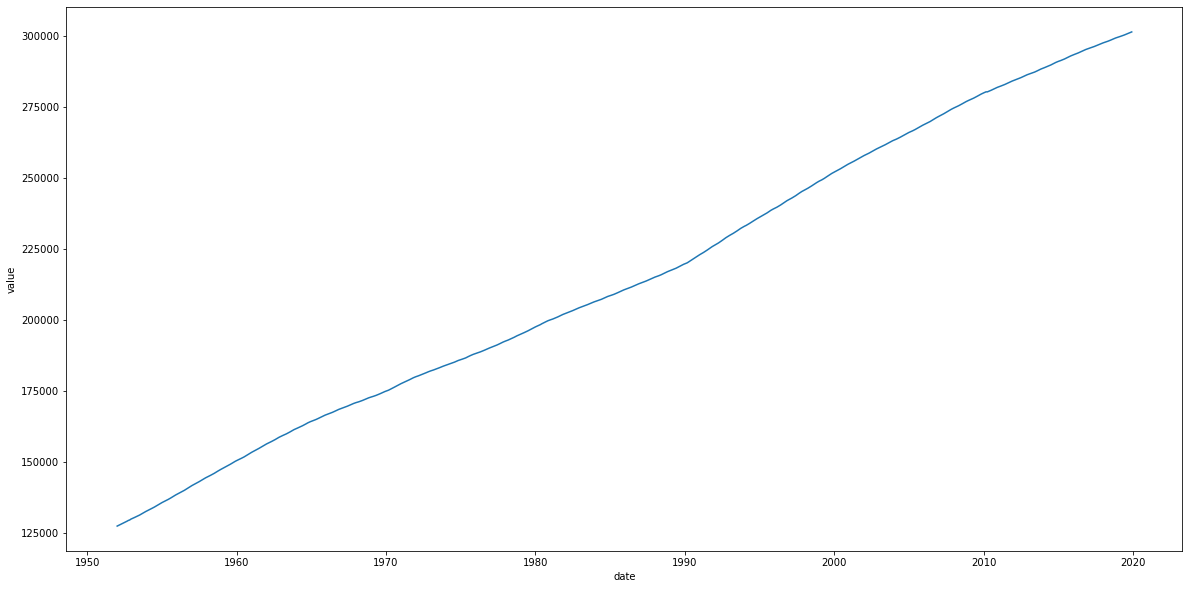

In [186]:
plt.figure(figsize=(20,10))
plt.xlabel("date")
plt.ylabel("value")
plt.plot(df['date'],df['value'])

In [195]:
#rolmean and rolstd

rolmean=df.rolling(window=12).mean()
rolstd=df.rolling(window=12).std()
print(rolmean.head(20))
print(rolstd.head(20))

            value
0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
5             NaN
6             NaN
7             NaN
8             NaN
9             NaN
10            NaN
11  128482.583333
12  128704.583333
13  128924.833333
14  129143.000000
15  129360.750000
16  129577.833333
17  129795.583333
18  130014.833333
19  130235.750000
         value
0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11  794.979526
12  806.297538
13  813.356439
14  812.209556
15  808.582163
16  797.733817
17  783.550249
18  769.160207
19  765.456622


$rolmean-rolstd- plot-daigram$

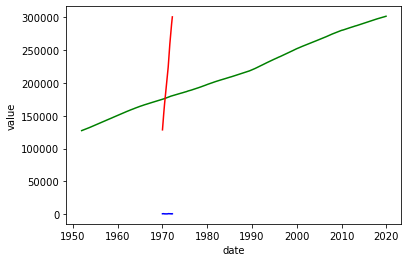

In [196]:

actuval=plt.plot(df['date'],df['value'],color='green',label='Actuval')
rolme=plt.plot(rolmean,color='red',label='rolmean')
rolstd=plt.plot(rolstd,color='blue',label='rolstd')
plt.xlabel('date')
plt.ylabel('value')
plt.show(block=False)


In [202]:
df.head()

,value,date
0,127299.0,1952-01-01
1,127517.0,1952-02-01
2,127721.0,1952-03-01
3,127933.0,1952-04-01
4,128130.0,1952-05-01


In [204]:
dt=pd.DataFrame()
dt['date']=df.iloc[:,1]
dt['population']=dt.iloc[:,0]
dt.head()

,date,population
0,1952-01-01,1952-01-01
1,1952-02-01,1952-02-01
2,1952-03-01,1952-03-01
3,1952-04-01,1952-04-01
4,1952-05-01,1952-05-01


In [206]:
dt['date']=pd.to_datetime(dt['date'], infer_datetime_format=True)

In [208]:
dt.head()

,date,population
0,1952-01-01,1952-01-01
1,1952-02-01,1952-02-01
2,1952-03-01,1952-03-01
3,1952-04-01,1952-04-01
4,1952-05-01,1952-05-01


In [217]:
from statsmodels.tsa.stattools import adfuller
print('Dickey-Fuller Test: ')
dftest=adfuller(dt['population'], autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Dickey-Fuller Test: 
Test Statistic            0.175624
p-value                   0.970861
Lags Used                12.000000
No. of Obs              803.000000
Critical Value (1%)      -3.438520
Critical Value (5%)      -2.865146
Critical Value (10%)     -2.568690
dtype: float64


-From above ADF test, we fail to reject the null hypothesis, since p-value is greater than 0.05

In [224]:
dat

array([[127299.0, Timestamp('1952-01-01 00:00:00')],
       [127517.0, Timestamp('1952-02-01 00:00:00')],
       [127721.0, Timestamp('1952-03-01 00:00:00')],
       ...,
       [300972.035, Timestamp('2019-10-01 00:00:00')],
       [301144.949, Timestamp('2019-11-01 00:00:00')],
       [301299.946, Timestamp('2019-12-01 00:00:00')]], dtype=object)